In [1]:

import dask.array as da
import dask
import zarr
import cv2
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

In [5]:
import sys
sys.path.append('..')  # '..' means parent directory
from MotionEnergyAnalyzer import MotionEnergyAnalyzer
import utils

In [3]:
# notebook dev
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [4]:

zarr_paths = utils.find_zarr_paths()

Searching for Zarr directories in /root/capsule/data: 100%|██████████| 2/2 [00:00<00:00, 18641.35it/s]
Searching for Zarr directories in /root/capsule/data/Thyme_736963_Face_zarr_motion_energy: 100%|██████████| 24/24 [00:00<00:00, 453438.27it/s]
Searching for Zarr directories in /root/capsule/data/Thyme_736963_Face_zarr_motion_energy/736963_Face_1a721702-ba3b-444d-93a9-88fab9563dae: 100%|██████████| 1/1 [00:00<00:00, 6533.18it/s]
Searching for Zarr directories in /root/capsule/data/Thyme_736963_Face_zarr_motion_energy/736963_Face_1a721702-ba3b-444d-93a9-88fab9563dae/motion_energy_frames.zarr: 100%|██████████| 2/2 [00:00<00:00, 45839.39it/s]
Searching for Zarr directories in /root/capsule/data/Thyme_736963_Face_zarr_motion_energy/736963_Face_1a721702-ba3b-444d-93a9-88fab9563dae/motion_energy_frames.zarr/data: 0it [00:00, ?it/s]
Searching for Zarr directories in /root/capsule/data/Thyme_736963_Face_zarr_motion_energy/736963_Face_1a721702-ba3b-444d-93a9-88fab9563dae/motion_energy_frames.z

Found Zarr directory: /root/capsule/data/Thyme_736963_Face_zarr_motion_energy
Found Zarr directory: /root/capsule/data/Thyme_736963_Face_zarr_motion_energy/736963_Face_1a721702-ba3b-444d-93a9-88fab9563dae/motion_energy_frames.zarr
Found Zarr directory: /root/capsule/data/Thyme_736963_Face_zarr_motion_energy/736963_Face_86affd31-6248-4674-9dc2-333c1954281e/motion_energy_frames.zarr
Found Zarr directory: /root/capsule/data/Thyme_736963_Face_zarr_motion_energy/736963_Face_a0f9dac8-36cc-42b4-a9de-5a4f4167aecd/motion_energy_frames.zarr
Found Zarr directory: /root/capsule/data/Thyme_736963_Face_zarr_motion_energy/736963_Face_77436158-af44-44bd-92ce-ba3d2a94abeb/motion_energy_frames.zarr
Found Zarr directory: /root/capsule/data/Thyme_736963_Face_zarr_motion_energy/736963_Face_49ad4944-44fe-4a87-9c0d-affb2839c58b/motion_energy_frames.zarr
Found Zarr directory: /root/capsule/data/Thyme_736963_Face_zarr_motion_energy/736963_Face_12592716-8311-4b4f-8874-f544a2f473f8/motion_energy_frames.zarr
Foun


Searching for Zarr directories in /root/capsule/data/Thyme_736963_Face_zarr_motion_energy/736963_Face_f40cc9c6-770b-4572-a6a2-56fba389c8be: 100%|██████████| 1/1 [00:00<00:00, 13107.20it/s]
Searching for Zarr directories in /root/capsule/data/Thyme_736963_Face_zarr_motion_energy/736963_Face_f40cc9c6-770b-4572-a6a2-56fba389c8be/motion_energy_frames.zarr: 100%|██████████| 2/2 [00:00<00:00, 46091.25it/s]
Searching for Zarr directories in /root/capsule/data/Thyme_736963_Face_zarr_motion_energy/736963_Face_f40cc9c6-770b-4572-a6a2-56fba389c8be/motion_energy_frames.zarr/data: 0it [00:00, ?it/s]
Searching for Zarr directories in /root/capsule/data/Thyme_736963_Face_zarr_motion_energy/736963_Face_f40cc9c6-770b-4572-a6a2-56fba389c8be/motion_energy_frames.zarr/cropped_data: 0it [00:00, ?it/s]
Searching for Zarr directories in /root/capsule/data/Thyme_736963_Face_zarr_motion_energy/736963_Face_f656588d-4d12-488e-baca-3b2f379be6bb: 100%|██████████| 1/1 [00:00<00:00, 13981.01it/s]
Searching for Zarr

Found Zarr directory: /root/capsule/data/Thyme_736963_Face_zarr_motion_energy/736963_Face_f40cc9c6-770b-4572-a6a2-56fba389c8be/motion_energy_frames.zarr
Found Zarr directory: /root/capsule/data/Thyme_736963_Face_zarr_motion_energy/736963_Face_f656588d-4d12-488e-baca-3b2f379be6bb/motion_energy_frames.zarr
Found Zarr directory: /root/capsule/data/Thyme_736963_Face_zarr_motion_energy/736963_Face_291eaa8a-b5c3-4ba1-9136-ae72f13fa50c/motion_energy_frames.zarr
Found Zarr directory: /root/capsule/data/Thyme_736963_Face_zarr_motion_energy/736963_Face_21a6c72f-5729-4120-9d63-bb690951d3ba/motion_energy_frames.zarr
Found Zarr directory: /root/capsule/data/Thyme_736963_Face_zarr_motion_energy/736963_Face_a459fd45-682f-4023-bfd8-4035dde8f4ec/motion_energy_frames.zarr
Found Zarr directory: /root/capsule/data/Thyme_736963_Face_zarr_motion_energy/736963_Face_c085c5b9-d3cd-466f-a379-c791fed5ac2c/motion_energy_frames.zarr
Found Zarr directory: /root/capsule/data/Thyme_736963_Face_zarr_motion_energy/7369

Searching for Zarr directories in /root/capsule/data/Thyme_736963_Face_Zarr/736963_Face_c08045d7-3c52-4546-bec5-5f9ee63e5d4c/processed_frames_zarr/data: 0it [00:00, ?it/s]
Searching for Zarr directories in /root/capsule/data/Thyme_736963_Face_Zarr/736963_Face_4084b35a-ef15-402e-8ea2-44fbd0e086a1: 100%|██████████| 1/1 [00:00<00:00, 8338.58it/s]
Searching for Zarr directories in /root/capsule/data/Thyme_736963_Face_Zarr/736963_Face_4084b35a-ef15-402e-8ea2-44fbd0e086a1/processed_frames_zarr: 100%|██████████| 1/1 [00:00<00:00, 22919.69it/s]
Searching for Zarr directories in /root/capsule/data/Thyme_736963_Face_Zarr/736963_Face_4084b35a-ef15-402e-8ea2-44fbd0e086a1/processed_frames_zarr/data: 0it [00:00, ?it/s]
Searching for Zarr directories in /root/capsule/data/Thyme_736963_Face_Zarr/736963_Face_1917eff5-8bfd-45a8-9f3e-2ca776910a2d: 100%|██████████| 1/1 [00:00<00:00, 10699.76it/s]
Searching for Zarr directories in /root/capsule/data/Thyme_736963_Face_Zarr/736963_Face_1917eff5-8bfd-45a8-9f3

Found Zarr directory: /root/capsule/data/Thyme_736963_Face_Zarr/736963_Face_4084b35a-ef15-402e-8ea2-44fbd0e086a1/processed_frames_zarr
Found Zarr directory: /root/capsule/data/Thyme_736963_Face_Zarr/736963_Face_1917eff5-8bfd-45a8-9f3e-2ca776910a2d/processed_frames_zarr
Found Zarr directory: /root/capsule/data/Thyme_736963_Face_Zarr/736963_Face_f40cc9c6-770b-4572-a6a2-56fba389c8be/processed_frames_zarr
Found Zarr directory: /root/capsule/data/Thyme_736963_Face_Zarr/736963_Face_f656588d-4d12-488e-baca-3b2f379be6bb/processed_frames_zarr
Found Zarr directory: /root/capsule/data/Thyme_736963_Face_Zarr/736963_Face_291eaa8a-b5c3-4ba1-9136-ae72f13fa50c/processed_frames_zarr
Found Zarr directory: /root/capsule/data/Thyme_736963_Face_Zarr/736963_Face_21a6c72f-5729-4120-9d63-bb690951d3ba/processed_frames_zarr
Found Zarr directory: /root/capsule/data/Thyme_736963_Face_Zarr/736963_Face_a459fd45-682f-4023-bfd8-4035dde8f4ec/processed_frames_zarr
Found Zarr directory: /root/capsule/data/Thyme_736963_F

In [9]:
zarr_paths

['/root/capsule/data/Thyme_736963_Face_Zarr_video1/processed_frames_zarr']

In [5]:
root_group = zarr.open_group(zarr_paths[0], mode='r')
grayscale_frames = da.from_zarr(zarr_paths[0], component='data')

GroupNotFoundError: group not found at path ''

In [14]:
grayscale_frames.shape

(221488, 492, 658)

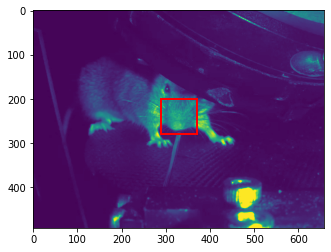

In [21]:
import matplotlib.patches as patches
rect_x, rect_y = 290, 200  # Top-left corner
rect_width, rect_height = 80, 80  # Width and height

# Create a figure and axis
fig, ax = plt.subplots()

# Display the image
ax.imshow(grayscale_frames[10,:,:])

# Create a rectangle patch (no fill, red border)
rect = patches.Rectangle((rect_x, rect_y), rect_width, rect_height,
                         linewidth=2, edgecolor='red', facecolor='none')

# Add the rectangle to the plot
ax.add_patch(rect)

# Show the plot
plt.show()                        





In [23]:
import json
metadata = json.loads(root_group.attrs['metadata'])

In [31]:
290-200

90

In [32]:
analyser = MotionEnergyAnalyzer(zarr_paths[0])

In [33]:
analyser.analyze()

(200, 290, 280, 360)
<class 'dask.array.core.Array'>
Video saved to '/root/capsule/results/736963_Face_1a721702-ba3b-444d-93a9-88fab9563dae/motion_energy_clip.avi'
Creating folder for motion energy frames of full video...
Saved motion energy frames to /root/capsule/results/736963_Face_1a721702-ba3b-444d-93a9-88fab9563dae/motion_energy_frames.zarr


PicklingError: Can't pickle <class 'MotionEnergyAnalyzer.MotionEnergyAnalyzer'>: it's not the same object as MotionEnergyAnalyzer.MotionEnergyAnalyzer

In [10]:
len(analyser.motion_energy_sum)

272033

In [12]:
len(analyser.loaded_metadata.get('timestamps'))

271980

In [ ]:

# Load the grayscale frames from the Zarr file
zarr_store_frames = zarr.DirectoryStore('video_frames_grayscale.zarr')
grayscale_frames = da.from_zarr(zarr_store_frames, component='frames')

# Compute motion energy as the absolute difference between consecutive frames
# This will be a Dask array operation that only loads and computes chunks as needed
motion_energy = da.abs(grayscale_frames[1:] - grayscale_frames[:-1])

# Define the chunking for efficient memory usage; rechunk if necessary
motion_energy = motion_energy.rechunk((100, 658, 492))  # Adjust based on available memory

# Save motion energy as a new Zarr file
zarr_store_motion = zarr.DirectoryStore('motion_energy_grayscale.zarr')
motion_energy.to_zarr(zarr_store_motion, overwrite=True)

# Compute the sum of motion energy for each frame and save as a NumPy array
# This sums across height and width (658, 492) to get the sum per frame (along the time dimension)
motion_energy_sum = motion_energy.sum(axis=(1, 2)).compute()

# Save the result as a NumPy array
np.save('motion_energy_sum.npy', motion_energy_sum)